In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,353.799988,355.489990,345.890015,349.589996,349.589996,3835100
1,2017-09-06,349.500000,350.980011,341.559998,344.529999,344.529999,4091400
2,2017-09-07,345.980011,352.480011,343.450012,350.609985,350.609985,4239200
3,2017-09-08,348.989990,349.779999,342.299988,343.399994,343.399994,3263500
4,2017-09-11,351.350006,363.709991,350.000000,363.690002,363.690002,7667100


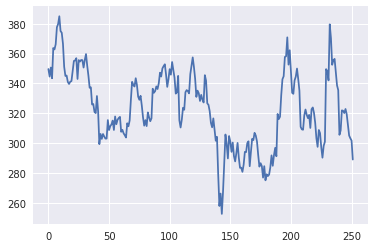

In [3]:
plt.plot(tesla.Close)
plt.show()

In [4]:
signal = np.copy(tesla.Close.values)

In [5]:
signal[-3:]

array([303.149994, 301.660004, 288.950012])

In [6]:
def moving_average(signal, period):
    buffer = []
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [7]:
def auto_regressive(signal, p, d, q, future_count=10):
    """
    p = the order (number of time lags)
    d = degree of differencing
    q = the order of the moving-average
    """
    buffer = np.copy(signal).tolist()
    for i in range(0,future_count,d):
        ma = moving_average(np.array(buffer[-p:]),q)
        forecast = buffer[-1]
        for n in range(len(ma)):
            forecast -= buffer[-1-n]-ma[n]
        buffer.append(forecast)
    return buffer

In [8]:
future_count = 15

In [9]:
predicted = auto_regressive(signal,30,1,2,future_count)

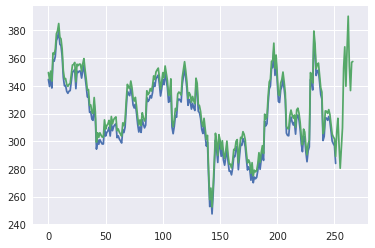

In [10]:
plt.plot(np.arange(len(tesla.Close)), signal-5) # minus to show the graph
plt.plot(np.arange(len(tesla.Close)+future_count), predicted)
plt.show()